<a href="https://colab.research.google.com/github/fernandodeeke/can2025/blob/main/zeros_funcoes_resolvidos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1></h1>
<center><h1>Cálculo Numérico CAN0001</h1></center>
<center><h2>2025/1</h2></center>
<center><h3>Fernando Deeke Sasse</h3></center>
<center><h3>CCT - UDESC</h3></center>
<center><h2>Zeros de Funções: Problemas Resolvidos</h2></center>

**1**.   Seja $f(x) = \cos(x^2)+\sin x+1$. Use o método da bissecção para encontrar a menor raiz positiva. Use o número de iterações mínimo para garantir uma acurácia maior que $10^{-8}$ para o intervalo que contém a raiz. Apresente gráficos.


Usaremos a biblioteca simpy.

In [ ]:
from matplotlib.pyplot import *
from sympy import *
init_printing()

In [ ]:
x=symbols('x')
f= Lambda(x, cos(x**2)+sin(x)+1)
f(x)

Façamos o gráfico para localizar as raízes reais:

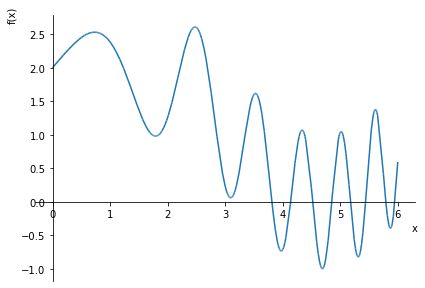

In [ ]:
plot(f(x),(x,0,6))

A menor raiz positiva está entre 3 e 4.  Podemos usar a seguinte função que implementa o método da bissecção:

In [ ]:
def bisseccao2(f,A,B,Nmax, epsilon):
    a=A
    b=B
    erro=1
    n=0
    while erro>epsilon and n<Nmax:
        if f(a)*f(b)>=0:
            print('O metodo falhou')
            return None
        m=(a+b)/2
        if f(a)*f(m)<0:
            b=m
        else:
            a=m
        erro=abs(a-b)
        n=n+1
    return (a+b)/2,n

In [ ]:
r = bisseccao2(f,3.,4.,60, 10**(-8))
r

Portanto tivemos que usar 27 iterações para obter a raiz.

In [ ]:
r[0]

**2**.  Usando a função definida no problema anterior, use o método de Newton-Raphson para determinar o extremo relativo $(z, f(z))$, $z>0$, mais próximo da origem. Use um número de iterações mínimo para para garantir uma acurácia maior que $10^{-10}$ para o intervalo que contém $z$. Apresente gráficos.

Devemos calcular procurar a primeira raiz real de $df/dx=0$:

In [ ]:
F=diff(f(x),x)
F

In [ ]:
G = Lambda(x, F)
G

Façamos um gráfico:

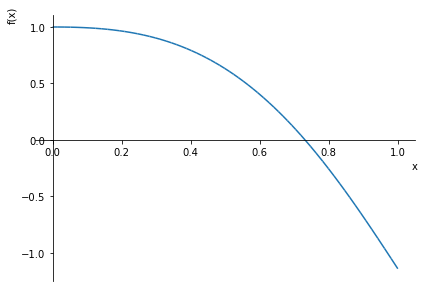

In [ ]:
plot(G(x),(x,0,1))

As iterações de Newton-Raphson são da forma:

$$
x_{i+1}=x_i-\frac{G(x_i)}{G'(x_i)}\,.
$$

Usaremos a seguinte função que implenta o método de Newton-Raphson:

In [ ]:
def newton_raphson3(f,a,Nmax, epsilon):
    erro=1
    n=0
    x0=float(a)
    df=diff(f(x),x)
    Df= Lambda(x,df)
    while erro>epsilon and n<Nmax:
        x1=x0-f(x0)/Df(x0)
        erro=abs(x1-x0)
        n=n+1
        x0=x1
    return x1,n

In [ ]:
epsilon = 10**(-10)
Nmax = 40
a = 0.6

O valor de $x=z$ que dá o primeiro extremo relativo mostrado no gráfico é dado por

In [ ]:
z = newton_raphson3(G,a,Nmax,epsilon)
z

Neste ponto a função $f$ tem o valor

In [ ]:
f(z[0])

Tal valor está de acordo com o gráfico.

**3**. Seja $f(x) = \ln(1/x)+1/x^2+1$. Use o método das secantes para encontrar a raiz real. Use o número de iterações mínimo para garantir uma acurácia maior que $10^{-8}$ para o intervalo que contém a raiz. Apresente gráficos.

In [ ]:
from matplotlib.pyplot import *
from sympy import *
init_printing()

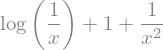

In [ ]:
x=symbols('x')
f= Lambda(x, ln(1/x)+1/x**2+1)
f(x)

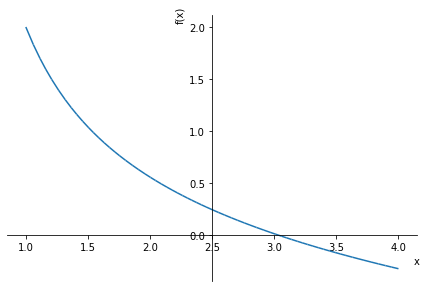

In [ ]:
plot(f(x),(x,1,4))

Temos uma raiz próxima a $x=3$. Utilizaremos a seguinte função para o método das secantes:

In [ ]:
def secante3(f,a,b,Nmax, epsilon):
    erro=1
    n=0
    x0=float(a)
    x1=float(b)
    while erro>epsilon and n<Nmax:
            x2=float(x1-f(x1)/(f(x1)-f(x0))*(x1-x0))
            x0=x1
            x1=x2
            erro=abs(x1-x0)
            n=n+1
    return x1,n

In [ ]:
a=3
b=3.3
Nmax=40
epsilon=10**(-8)

In [ ]:
r3 = secante3(f,a,b,Nmax, epsilon)
r3

Tal valor está de acordo com o gráfico.

**4**. Determine todas as raízes reais de $f(x)=\sin x-\sin(x^3)-1$ no intervalo [0,4], usando o solver do sistema. Verfique a acurácia dos resultados para as raízes , calculando para cada caso. Apresente gráficos.

Usaremos numpy e scipy.optimize:

In [ ]:
from matplotlib.pyplot import *
from numpy import *
from scipy.optimize import *

Definimos a função:

In [ ]:
 def f(x):
        return sin(x)-sin(x**3)-1

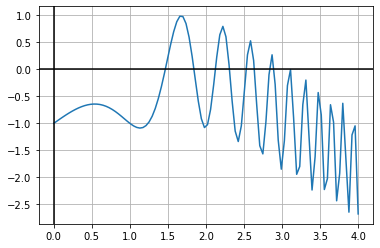

In [ ]:
x=linspace(0,4,100)
fig, ax = subplots()
ax.grid(True, which='both')
ax.plot(x, f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

Temos possivelmente 10 raízes. Examinemos com mais cuidado o ponto em que a curva aparentemente toca o eixo $x$:

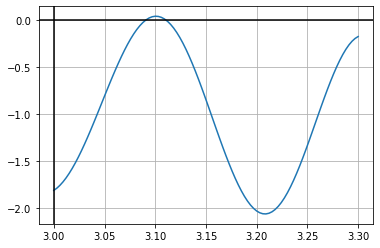

In [ ]:
x=linspace(3,3.3,100)
fig, ax = subplots()
ax.grid(True, which='both')
ax.plot(x, f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=3, color='k')

Tal gráfico confirma que temos realmente 10 raízes reais no intervalo [0,4].

Tal gráfico confirma que temos realmente 10 raízes reais no intervalo [0,4]. Busquemos as 10 raízes selecionando cada ponto inicial separadamente, usando um gráfico mais detalhado, quando necessário. Usaremos o comando fsolve.

In [ ]:
r1 = fsolve(f, [1.43])
r1

array([1.46545283])

In [ ]:
r2 = fsolve(f, [1.8])
r2

array([1.84169236])

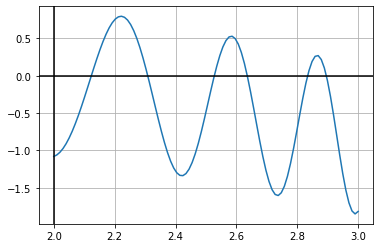

In [ ]:
x=linspace(2,3,100)
fig, ax = subplots()
ax.grid(True, which='both')
ax.plot(x, f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=2, color='k')

In [ ]:
r3 = fsolve(f, [2.124])
r3

array([2.12340984])

In [ ]:
r4 = fsolve(f, [2.25])
r4

array([2.30855813])

In [ ]:
r5 = fsolve(f, [2.56])
r5

array([2.52745966])

In [ ]:
r6 = fsolve(f, [2.6])
r6

array([2.63561243])

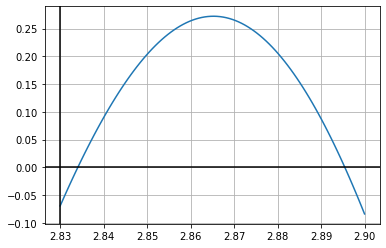

In [ ]:
x=linspace(2.830,2.9,100)
fig, ax = subplots()
ax.grid(True, which='both')
ax.plot(x, f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=2.830, color='k')

In [ ]:
r7 = fsolve(f, [2.8350])
r7

array([2.83405498])

In [ ]:
r8 = fsolve(f, [2.9])
r8

array([2.89547496])

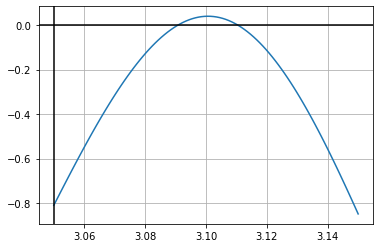

In [ ]:
x=linspace(3.05,3.15,100)
fig, ax = subplots()
ax.grid(True, which='both')
ax.plot(x, f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=3.05, color='k')

In [ ]:
r9 = fsolve(f, [3.08])
r9

array([3.0907435])

In [ ]:
r10 = fsolve(f, [3.12])
r10

array([3.11051176])

Portanto, as raízes são:

In [ ]:
print(r1,r2,r3,r4,r5,r6,r7,r8,r9,r10)

[1.46545283] [1.84169236] [2.12340984] [2.30855813] [2.52745966] [2.63561243] [2.83405498] [2.89547496] [3.0907435] [3.11051176]
